<a href="https://colab.research.google.com/github/zaki391/Stock-Price-Trend-Prediction-using-the-time-series-data/blob/main/%E2%80%98Stock_Price_Trend_Prediction_using_the_time_series_data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import os
import pandas as pd
import numpy as np
import math
import datetime as dt

from sklearn.metrics import mean_squared_error, mean_absolute_error, explained_variance_score, r2_score
from sklearn.metrics import mean_poisson_deviance, mean_gamma_deviance, accuracy_score
from sklearn.preprocessing import MinMaxScaler

from itertools import cycle
import plotly.graph_objects as go
import plotly.express as px
from plotly.subplots import make_subplots
import seaborn as sns
import matplotlib.pyplot as plt


In [4]:
bitcoindf = pd.read_csv('/content/BNB-USD.csv')
bitcoindf = bitcoindf.rename(columns={'Date': 'date','Open':'open','High':'high','Low':'low','Close':'close',
                                'Adj Close':'adj_close','Volume':'volume'})
bitcoindf.head()

,date,open,high,low,close,adj_close,volume
0,2017-09-13,1.042900,1.042900,0.880241,0.937204,0.937204,2780700.0
1,2017-09-14,0.937870,0.950177,0.673482,0.678784,0.678784,3134360.0
2,2017-09-15,0.683305,0.849217,0.526755,0.799709,0.799709,4625680.0
3,2017-09-16,0.808056,0.927197,0.746113,0.804198,0.804198,2829570.0
4,2017-09-17,0.803423,0.814797,0.733745,0.789589,0.789589,1273640.0


In [6]:
dogecoindf = pd.read_csv('/content/BNB-USD.csv')
dogecoindf = dogecoindf.rename(columns={'Date': 'date','Open':'open','High':'high','Low':'low','Close':'close',
                                'Adj Close':'adj_close','Volume':'volume'})
dogecoindf.head()

,date,open,high,low,close,adj_close,volume
0,2017-09-13,1.042900,1.042900,0.880241,0.937204,0.937204,2780700.0
1,2017-09-14,0.937870,0.950177,0.673482,0.678784,0.678784,3134360.0
2,2017-09-15,0.683305,0.849217,0.526755,0.799709,0.799709,4625680.0
3,2017-09-16,0.808056,0.927197,0.746113,0.804198,0.804198,2829570.0
4,2017-09-17,0.803423,0.814797,0.733745,0.789589,0.789589,1273640.0


In [7]:
dogecoindf = pd.read_csv('/content/BNB-USD.csv')
dogecoindf = dogecoindf.rename(columns={'Date': 'date','Open':'open','High':'high','Low':'low','Close':'close',
                                'Adj Close':'adj_close','Volume':'volume'})
dogecoindf.head()

,date,open,high,low,close,adj_close,volume
0,2017-09-13,1.042900,1.042900,0.880241,0.937204,0.937204,2780700.0
1,2017-09-14,0.937870,0.950177,0.673482,0.678784,0.678784,3134360.0
2,2017-09-15,0.683305,0.849217,0.526755,0.799709,0.799709,4625680.0
3,2017-09-16,0.808056,0.927197,0.746113,0.804198,0.804198,2829570.0
4,2017-09-17,0.803423,0.814797,0.733745,0.789589,0.789589,1273640.0


In [8]:
ethereumdf = pd.read_csv('/content/BNB-USD.csv')
ethereumdf = ethereumdf.rename(columns={'Date': 'date','Open':'open','High':'high','Low':'low','Close':'close',
                                'Adj Close':'adj_close','Volume':'volume'})
ethereumdf.head()

,date,open,high,low,close,adj_close,volume
0,2017-09-13,1.042900,1.042900,0.880241,0.937204,0.937204,2780700.0
1,2017-09-14,0.937870,0.950177,0.673482,0.678784,0.678784,3134360.0
2,2017-09-15,0.683305,0.849217,0.526755,0.799709,0.799709,4625680.0
3,2017-09-16,0.808056,0.927197,0.746113,0.804198,0.804198,2829570.0
4,2017-09-17,0.803423,0.814797,0.733745,0.789589,0.789589,1273640.0


In [9]:
cardanodf = pd.read_csv('/content/BNB-USD.csv')
cardanodf = cardanodf.rename(columns={'Date': 'date','Open':'open','High':'high','Low':'low','Close':'close',
                                'Adj Close':'adj_close','Volume':'volume'})
cardanodf.head()

,date,open,high,low,close,adj_close,volume
0,2017-09-13,1.042900,1.042900,0.880241,0.937204,0.937204,2780700.0
1,2017-09-14,0.937870,0.950177,0.673482,0.678784,0.678784,3134360.0
2,2017-09-15,0.683305,0.849217,0.526755,0.799709,0.799709,4625680.0
3,2017-09-16,0.808056,0.927197,0.746113,0.804198,0.804198,2829570.0
4,2017-09-17,0.803423,0.814797,0.733745,0.789589,0.789589,1273640.0


In [10]:
bitcoindf = bitcoindf.fillna(method = 'ffill')
dogecoindf = dogecoindf.fillna(method = 'ffill')
ethereumdf = ethereumdf.fillna(method = 'ffill')
cardanodf = cardanodf.fillna(method = 'ffill')

In [14]:
bitcoindf['date'] = pd.to_datetime(bitcoindf.date)
bitcoindf.head().style.set_properties(subset=['date','close'], **{'background-color': 'red'})

,date,open,high,low,close,adj_close,volume
0,2017-09-13 00:00:00,1.042900,1.042900,0.880241,0.937204,0.937204,2780700.000000
1,2017-09-14 00:00:00,0.937870,0.950177,0.673482,0.678784,0.678784,3134360.000000
2,2017-09-15 00:00:00,0.683305,0.849217,0.526755,0.799709,0.799709,4625680.000000
3,2017-09-16 00:00:00,0.808056,0.927197,0.746113,0.804198,0.804198,2829570.000000
4,2017-09-17 00:00:00,0.803423,0.814797,0.733745,0.789589,0.789589,1273640.000000


In [17]:
dogecoindf['date'] = pd.to_datetime(dogecoindf.date)
dogecoindf.head().style.set_properties(subset=['date','close'], **{'background-color': 'green'})

,date,open,high,low,close,adj_close,volume
0,2017-09-13 00:00:00,1.042900,1.042900,0.880241,0.937204,0.937204,2780700.000000
1,2017-09-14 00:00:00,0.937870,0.950177,0.673482,0.678784,0.678784,3134360.000000
2,2017-09-15 00:00:00,0.683305,0.849217,0.526755,0.799709,0.799709,4625680.000000
3,2017-09-16 00:00:00,0.808056,0.927197,0.746113,0.804198,0.804198,2829570.000000
4,2017-09-17 00:00:00,0.803423,0.814797,0.733745,0.789589,0.789589,1273640.000000


In [19]:
ethereumdf['date'] = pd.to_datetime(ethereumdf.date)
ethereumdf.head().style.set_properties(subset=['date','close'], **{'background-color': 'blue'})

,date,open,high,low,close,adj_close,volume
0,2017-09-13 00:00:00,1.042900,1.042900,0.880241,0.937204,0.937204,2780700.000000
1,2017-09-14 00:00:00,0.937870,0.950177,0.673482,0.678784,0.678784,3134360.000000
2,2017-09-15 00:00:00,0.683305,0.849217,0.526755,0.799709,0.799709,4625680.000000
3,2017-09-16 00:00:00,0.808056,0.927197,0.746113,0.804198,0.804198,2829570.000000
4,2017-09-17 00:00:00,0.803423,0.814797,0.733745,0.789589,0.789589,1273640.000000


In [24]:
cardanodf['date'] = pd.to_datetime(cardanodf.date)
cardanodf.head().style.set_properties(subset=['date','close'], **{'background-color': 'orange'})

,date,open,high,low,close,adj_close,volume
0,2017-09-13 00:00:00,1.042900,1.042900,0.880241,0.937204,0.937204,2780700.000000
1,2017-09-14 00:00:00,0.937870,0.950177,0.673482,0.678784,0.678784,3134360.000000
2,2017-09-15 00:00:00,0.683305,0.849217,0.526755,0.799709,0.799709,4625680.000000
3,2017-09-16 00:00:00,0.808056,0.927197,0.746113,0.804198,0.804198,2829570.000000
4,2017-09-17 00:00:00,0.803423,0.814797,0.733745,0.789589,0.789589,1273640.000000


Text(0.5, 1.0, 'Ethereum Close Price')

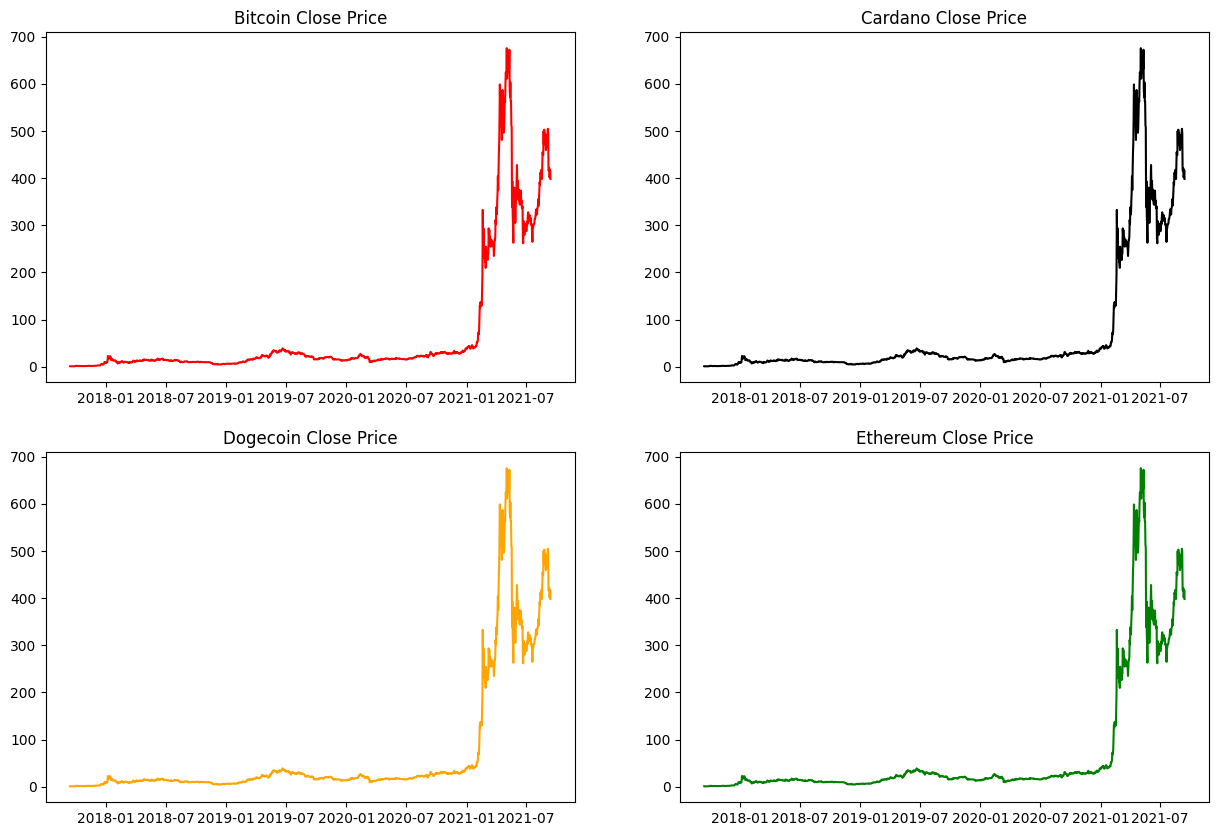

In [25]:
fig = plt.figure(figsize = (15,10))

plt.subplot(2, 2, 1)
plt.plot(bitcoindf['date'], bitcoindf['close'], color="red")
plt.title('Bitcoin Close Price')

plt.subplot(2, 2, 2)
plt.plot(cardanodf['date'], cardanodf['close'], color="black")
plt.title('Cardano Close Price')

plt.subplot(2, 2, 3)
plt.plot(dogecoindf['date'], dogecoindf['close'], color="orange")
plt.title('Dogecoin Close Price')

plt.subplot(2, 2, 4)
plt.plot(ethereumdf['date'], ethereumdf['close'], color="green")
plt.title('Ethereum Close Price')


In [26]:
last1year_bitcoindf = bitcoindf[bitcoindf['date'] > '09-2020']
last1year_cardanodf = cardanodf[cardanodf['date'] > '09-2020']
last1year_dogecoindf = dogecoindf[dogecoindf['date'] > '09-2020']
last1year_ethereumdf = ethereumdf[ethereumdf['date'] > '09-2020']

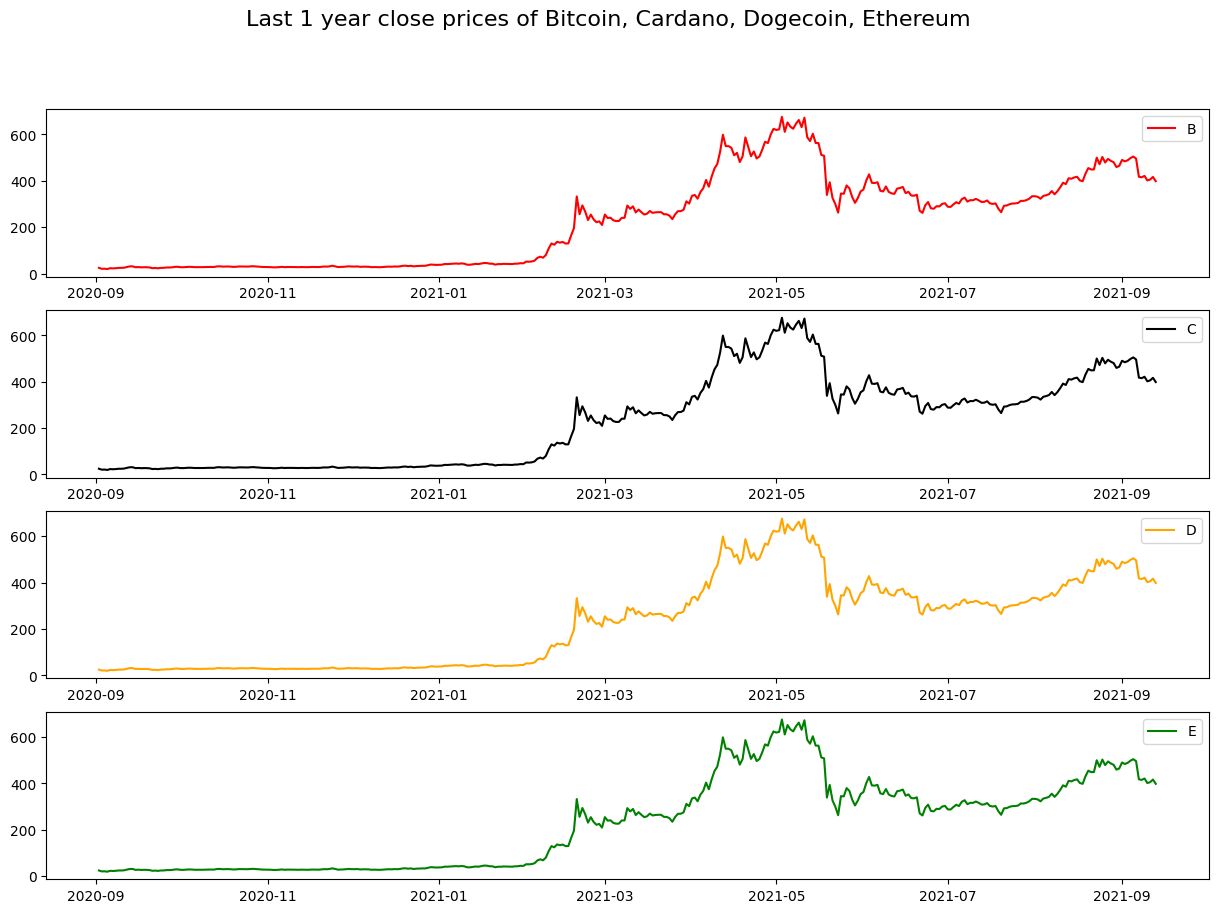

In [27]:
fig = plt.figure(figsize = (15,10))
fig.suptitle("Last 1 year close prices of Bitcoin, Cardano, Dogecoin, Ethereum", fontsize=16)


plt.subplot(4, 1, 1)
plt.plot(last1year_bitcoindf['date'], last1year_bitcoindf['close'], color="red")
plt.legend("B")

plt.subplot(4, 1, 2)
plt.plot(last1year_cardanodf['date'], last1year_cardanodf['close'], color="black")
plt.legend("C")

plt.subplot(4, 1, 3)
plt.plot(last1year_dogecoindf['date'], last1year_dogecoindf['close'], color="orange")
plt.legend("D")
plt.subplot(4, 1, 4)
plt.plot(last1year_ethereumdf['date'], last1year_ethereumdf['close'], color="green")
plt.legend("E")

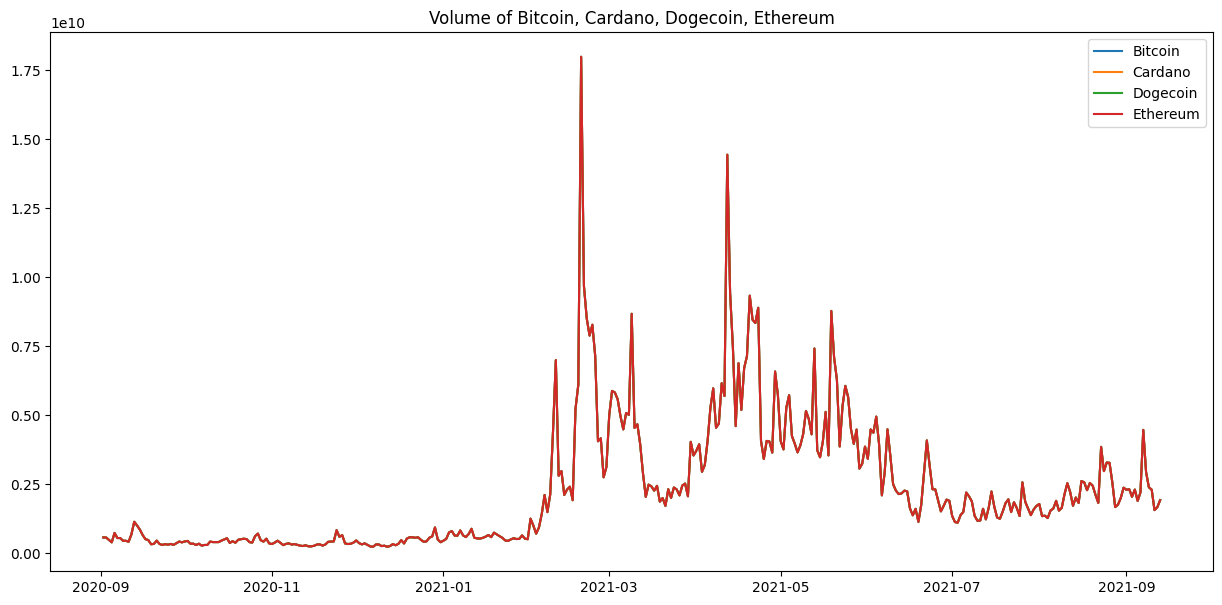

In [28]:
fig = plt.figure(figsize = (15,7))

plt.plot(last1year_bitcoindf['date'] , last1year_bitcoindf['volume'])
plt.plot(last1year_cardanodf['date'] , last1year_cardanodf['volume'])
plt.plot(last1year_dogecoindf['date'], last1year_dogecoindf['volume'])
plt.plot(last1year_ethereumdf['date'], last1year_ethereumdf['volume'])
plt.title('Volume of Bitcoin, Cardano, Dogecoin, Ethereum')
plt.legend(['Bitcoin', 'Cardano', 'Dogecoin', 'Ethereum'])


plt.show()

In [29]:
last1month_bitcoindf = bitcoindf[bitcoindf['date'] > '08-2021']
last1month_cardanodf = cardanodf[cardanodf['date'] > '08-2021']
last1month_dogecoindf = dogecoindf[dogecoindf['date'] > '08-2021']
last1month_ethereumdf = ethereumdf[ethereumdf['date'] > '08-2021']

<function matplotlib.pyplot.show(close=None, block=None)>

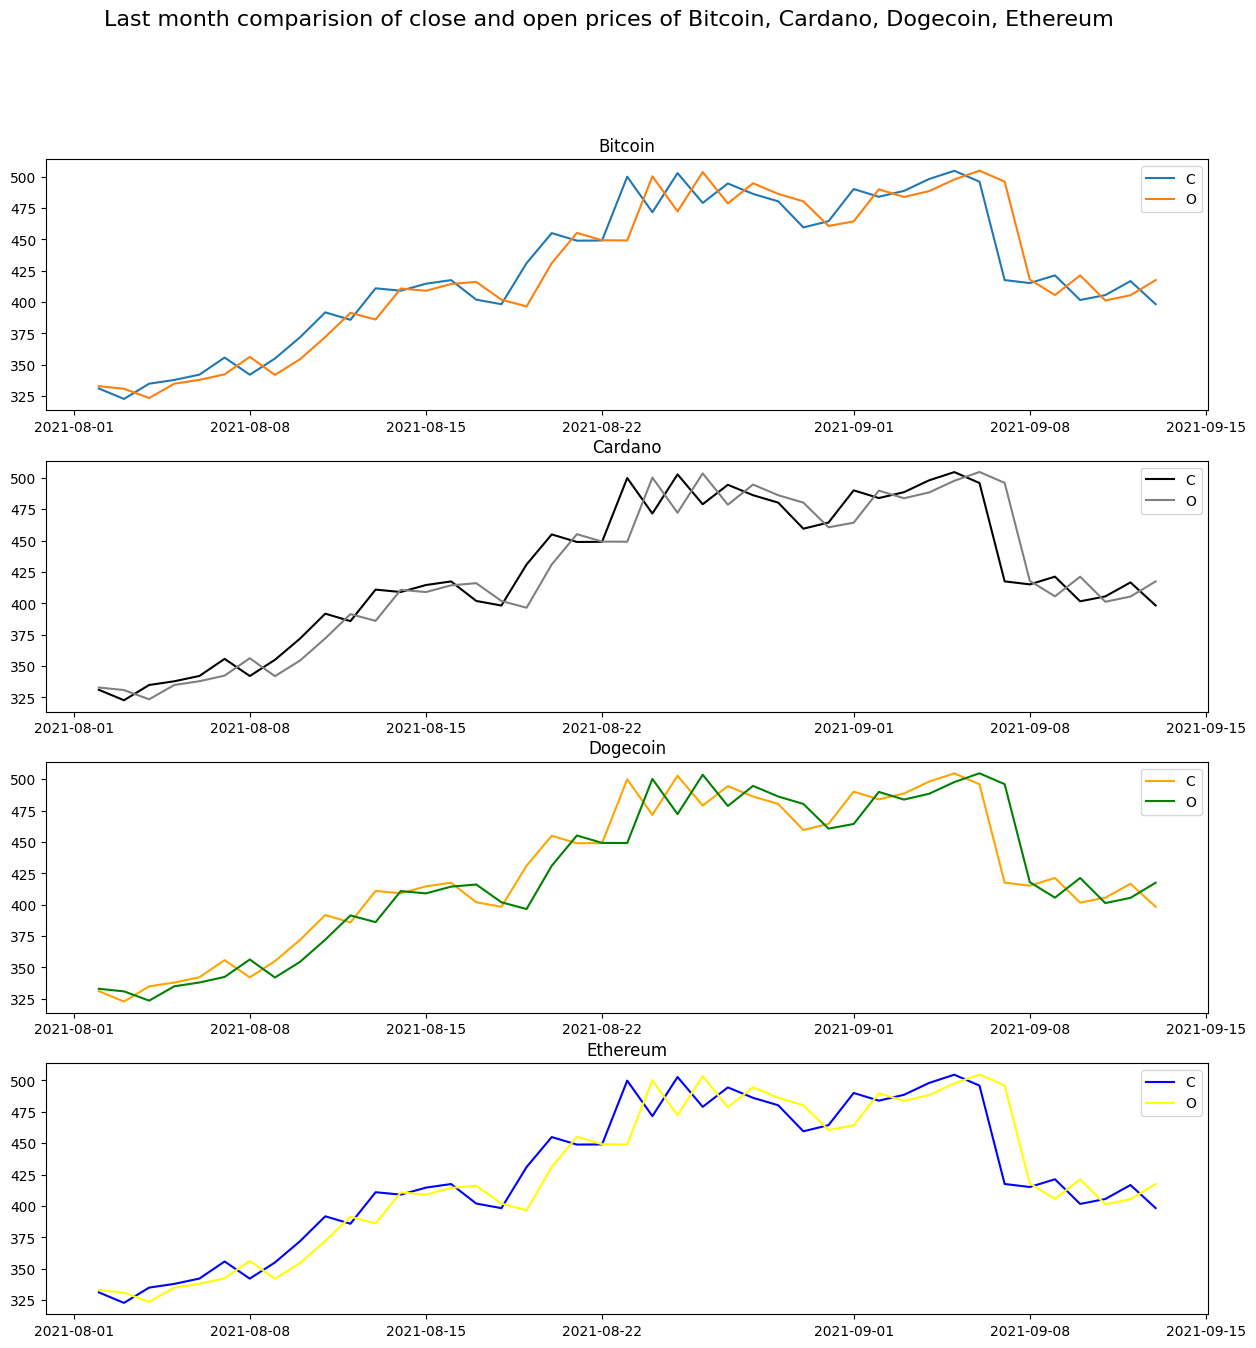

In [30]:
fig = plt.figure(figsize = (15,15))
fig.suptitle("Last month comparision of close and open prices of Bitcoin, Cardano, Dogecoin, Ethereum", fontsize=16)
fig.tight_layout()

plt.subplot(4, 1, 1)
plt.plot(last1month_bitcoindf['date'], last1month_bitcoindf['close'])
plt.plot(last1month_bitcoindf['date'], last1month_bitcoindf['open'])
plt.legend(["C", "O"])
plt.title("Bitcoin")

plt.subplot(4, 1, 2)
plt.plot(last1month_cardanodf['date'], last1month_cardanodf['close'], color="black")
plt.plot(last1month_cardanodf['date'], last1month_cardanodf['open'], color="grey")
plt.legend(["C", "O"])
plt.title("Cardano")
plt.subplot(4, 1, 3)
plt.plot(last1month_dogecoindf['date'], last1month_dogecoindf['close'], color="orange")
plt.plot(last1month_dogecoindf['date'], last1month_dogecoindf['open'], color="green")
plt.legend(["C", "O"])
plt.title("Dogecoin")

plt.subplot(4, 1, 4)
plt.plot(last1month_ethereumdf['date'], last1month_ethereumdf['close'], color="blue")
plt.plot(last1month_ethereumdf['date'], last1month_ethereumdf['open'], color="yellow")
plt.legend(["C", "O"])
plt.title("Ethereum")
plt.show

Text(0.5, 1.0, 'Ethereum Close Price moving average')

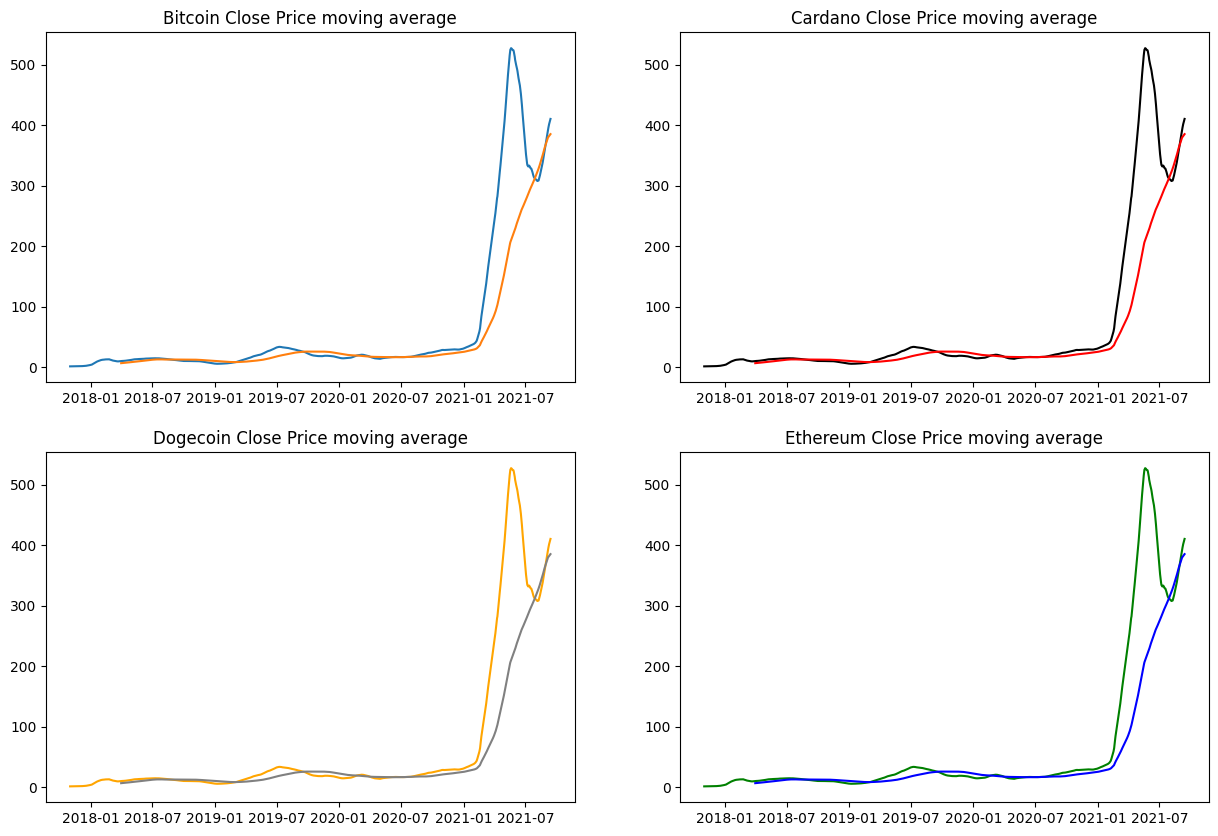

In [31]:
fig = plt.figure(figsize = (15,10))

plt.subplot(2, 2, 1)
plt.plot(bitcoindf['date'], bitcoindf['close'].rolling(50).mean())
plt.plot(bitcoindf['date'], bitcoindf['close'].rolling(200).mean())
plt.title('Bitcoin Close Price moving average')

plt.subplot(2, 2, 2)
plt.plot(cardanodf['date'], cardanodf['close'].rolling(50).mean(), color="black")
plt.plot(cardanodf['date'], cardanodf['close'].rolling(200).mean(), color="red")
plt.title('Cardano Close Price moving average')
plt.subplot(2, 2, 3)
plt.plot(dogecoindf['date'], dogecoindf['close'].rolling(50).mean(), color="orange")
plt.plot(dogecoindf['date'], dogecoindf['close'].rolling(200).mean(), color="grey")
plt.title('Dogecoin Close Price moving average')

plt.subplot(2, 2, 4)
plt.plot(ethereumdf['date'], ethereumdf['close'].rolling(50).mean(), color="green")
plt.plot(ethereumdf['date'], ethereumdf['close'].rolling(200).mean(), color="blue")
plt.title('Ethereum Close Price moving average')

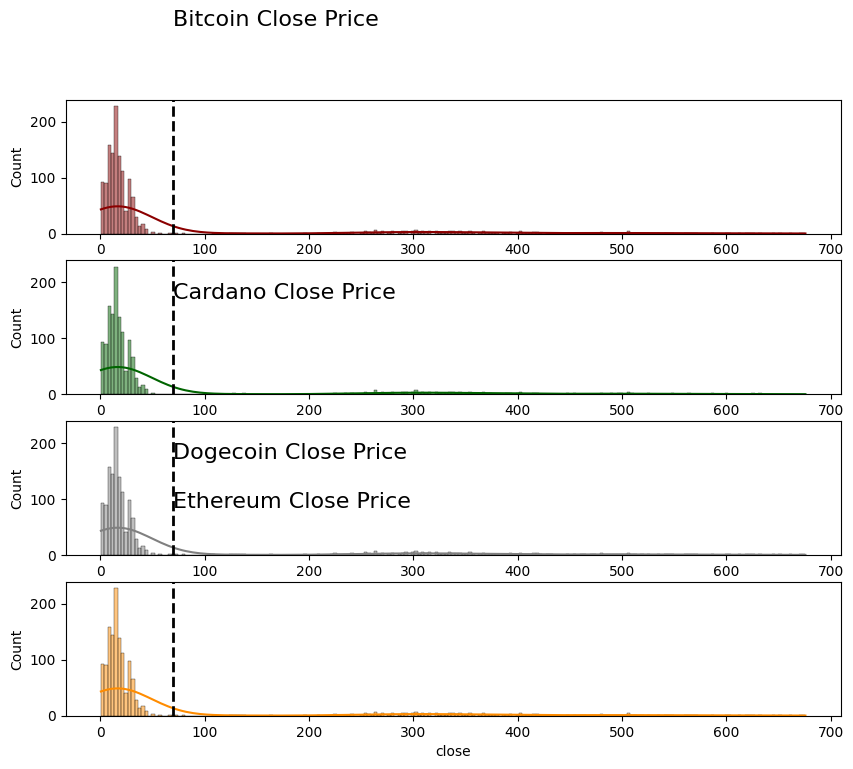

In [36]:
import matplotlib.pyplot as plt
import seaborn as sns

fig = plt.figure(figsize=(10, 8))  # Reduced figure size

fig.tight_layout()

plt.subplot(4, 1, 1)
sns.histplot(bitcoindf['close'], color='darkred', kde=True)
plt.axvline(bitcoindf['close'].mean(), color='k', linestyle='dashed', linewidth=2)
plt.text(bitcoindf['close'].mean(), 400, 'Bitcoin Close Price', fontsize=16, verticalalignment='top')

plt.subplot(4, 1, 2)
sns.histplot(cardanodf['close'], color='darkgreen', kde=True)
plt.axvline(cardanodf['close'].mean(), color='k', linestyle='dashed', linewidth=2)
plt.text(cardanodf['close'].mean(), 200, 'Cardano Close Price', fontsize=16, verticalalignment='top')

plt.subplot(4, 1, 3)
sns.histplot(dogecoindf['close'], color='grey', kde=True)
plt.axvline(dogecoindf['close'].mean(), color='k', linestyle='dashed', linewidth=2)
plt.text(dogecoindf['close'].mean(), 200, 'Dogecoin Close Price', fontsize=16, verticalalignment='top')

plt.subplot(4, 1, 4)
sns.histplot(ethereumdf['close'], color='darkorange', kde=True)
plt.axvline(ethereumdf['close'].mean(), color='k', linestyle='dashed', linewidth=2)
plt.text(ethereumdf['close'].mean(), 400, 'Ethereum Close Price', fontsize=16, verticalalignment='top')

plt.show()


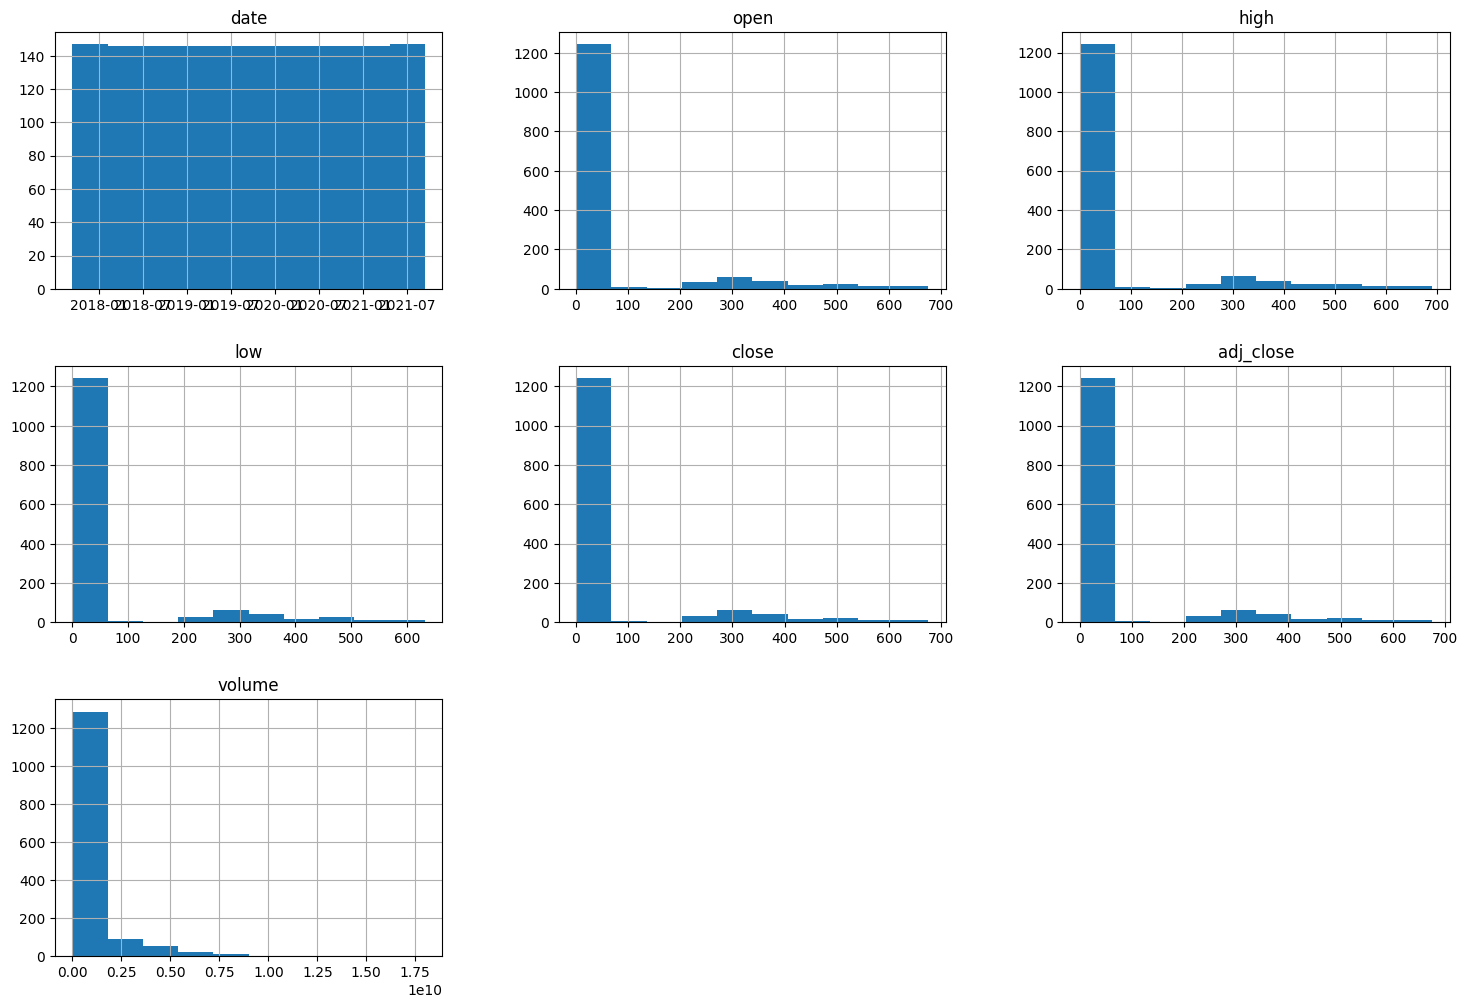

In [37]:
bitcoin_numeric = bitcoindf.select_dtypes(exclude = ["bool"])
bitcoin_numeric.hist(figsize=(18,12))
plt.show()

In [38]:
closedf = bitcoindf[['date','close']]
print("Shape of close dataframe:", closedf.shape)

Shape of close dataframe: (1462, 2)


In [39]:
closedf = closedf[closedf['date'] > '2020-09-13']
close_stock = closedf.copy()
print("Total data for prediction: ",closedf.shape[0])

Total data for prediction:  365


In [40]:
del closedf['date']
scaler=MinMaxScaler(feature_range=(0,1))
closedf=scaler.fit_transform(np.array(closedf).reshape(-1,1))
print(closedf.shape)

(365, 1)


In [41]:
training_size=int(len(closedf)*0.70)
test_size=len(closedf)-training_size
train_data,test_data=closedf[0:training_size,:],closedf[training_size:len(closedf),:1]
print("train_data: ", train_data.shape)
print("test_data: ", test_data.shape)

train_data:  (255, 1)
test_data:  (110, 1)


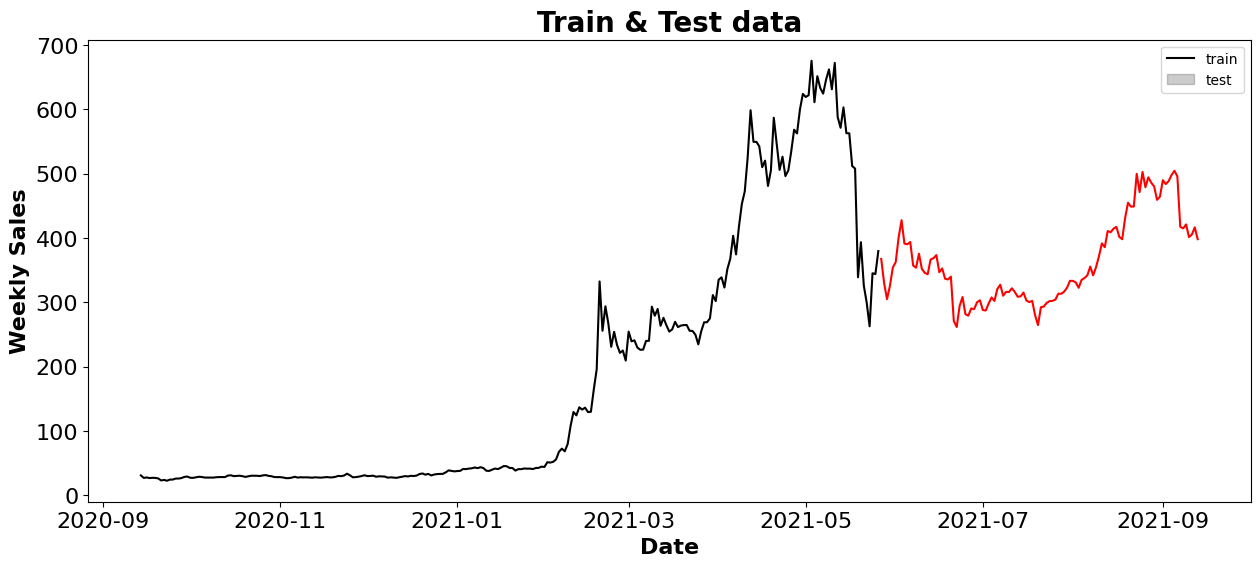

In [42]:
fig, ax = plt.subplots(figsize=(15, 6))
sns.lineplot(x = close_stock['date'][:255], y = close_stock['close'][:255], color = 'black')
sns.lineplot(x = close_stock['date'][255:], y = close_stock['close'][255:], color = 'red')

# Formatting
ax.set_title('Train & Test data', fontsize = 20, loc='center', fontdict=dict(weight='bold'))
ax.set_xlabel('Date', fontsize = 16, fontdict=dict(weight='bold'))
ax.set_ylabel('Weekly Sales', fontsize = 16, fontdict=dict(weight='bold'))
plt.tick_params(axis='y', which='major', labelsize=16)
plt.tick_params(axis='x', which='major', labelsize=16)
plt.legend(loc='upper right' ,labels = ('train', 'test'))

In [43]:
# convert an array of values into a dataset matrix
def create_dataset(dataset, time_step=1):
    dataX, dataY = [], []
    for i in range(len(dataset)-time_step-1):
        a = dataset[i:(i+time_step), 0]   ###i=0, 0,1,2,3-----99   100
        dataX.append(a)
        dataY.append(dataset[i + time_step, 0])
    return np.array(dataX), np.array(dataY)

In [44]:
time_step = 15
X_train, y_train = create_dataset(train_data, time_step)
X_test, y_test = create_dataset(test_data, time_step)

print("X_train: ", X_train.shape)
print("y_train: ", y_train.shape)
print("X_test: ", X_test.shape)
print("y_test", y_test.shape)

X_train:  (239, 15)
y_train:  (239,)
X_test:  (94, 15)
y_test (94,)


In [45]:
from xgboost import XGBRegressor
my_model = XGBRegressor(n_estimators=1000)
my_model.fit(X_train, y_train, verbose=False)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=1000, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [46]:
predictions = my_model.predict(X_test)
print("Mean Absolute Error - MAE : " + str(mean_absolute_error(y_test, predictions)))
print("Root Mean squared Error - RMSE : " + str(math.sqrt(mean_squared_error(y_test, predictions))))

Mean Absolute Error - MAE : 0.04979482089118185
Root Mean squared Error - RMSE : 0.06324286902277301


In [48]:
train_predict=my_model.predict(X_train)
test_predict=my_model.predict(X_test)
train_predict = train_predict.reshape(-1,1)
test_predict = test_predict.reshape(-1,1)

print("Train data prediction:", train_predict.shape)
print("Test data prediction:", test_predict.shape)

Train data prediction: (239, 1)
Test data prediction: (94, 1)


In [49]:
look_back=time_step
trainPredictPlot = np.empty_like(closedf)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(train_predict)+look_back, :] = train_predict
print("Train predicted data: ", trainPredictPlot.shape)

# shift test predictions for plotting
testPredictPlot = np.empty_like(closedf)
testPredictPlot[:, :] = np.nan
testPredictPlot[len(train_predict)+(look_back*2)+1:len(closedf)-1, :] = test_predict
print("Test predicted data: ", testPredictPlot.shape)
names = cycle(['Original close price','Train predicted close price','Test predicted close price'])

plotdf = pd.DataFrame({'date': close_stock['date'],
                       'original_close': close_stock['close'],
                      'train_predicted_close': trainPredictPlot.reshape(1,-1)[0].tolist(),
                      'test_predicted_close': testPredictPlot.reshape(1,-1)[0].tolist()})

fig = px.line(plotdf,x=plotdf['date'], y=[plotdf['original_close'],plotdf['train_predicted_close'],
                                          plotdf['test_predicted_close']],
              labels={'value':'Close price','date': 'Date'})
fig.update_layout(title_text='Comparision between original close price vs predicted close price', plot_bgcolor='white', font_size=15, font_color='black',legend_title_text='Close Price')
fig.for_each_trace(lambda t:  t.update(name = next(names)))

fig.update_xaxes(showgrid=False)
fig.update_yaxes(showgrid=False)
fig.show()

Train predicted data:  (365, 1)
Test predicted data:  (365, 1)


In [53]:
x_input=test_data[len(test_data)-time_step:].reshape(1,-1)
temp_input=list(x_input)
temp_input=temp_input[0].tolist()

from numpy import array

lst_output=[]
n_steps=time_step
i=0
pred_days = 10
while(i<pred_days):

    if(len(temp_input)>time_step):

        x_input = np.array(temp_input[1:])
        #print("{} day input {}".format(i,x_input))
        x_input=x_input.reshape(1,-1)
        yhat = my_model.predict(x_input)
        #print("{} day output {}".format(i,yhat))
        temp_input.extend(yhat.tolist())
        temp_input=temp_input[1:]

        lst_output.extend(yhat.tolist())
        i=i+1

    else:
        yhat = my_model.predict(x_input)

        temp_input.extend(yhat.tolist())
        lst_output.extend(yhat.tolist())

        i=i+1

print ("Output of predicted next days: ", len(lst_output))

Output of predicted next days:  10


In [54]:
last_days=np.arange(1,time_step+1)
day_pred=np.arange(time_step+1,time_step+pred_days+1)
print(last_days)
print(day_pred)

[ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15]
[16 17 18 19 20 21 22 23 24 25]


In [55]:
temp_mat = np.empty((len(last_days)+pred_days+1,1))
temp_mat[:] = np.nan
temp_mat = temp_mat.reshape(1,-1).tolist()[0]

last_original_days_value = temp_mat
next_predicted_days_value = temp_mat

last_original_days_value[0:time_step+1] = scaler.inverse_transform(closedf[len(closedf)-time_step:]).reshape(1,-1).tolist()[0]
next_predicted_days_value[time_step+1:] = scaler.inverse_transform(np.array(lst_output).reshape(-1,1)).reshape(1,-1).tolist()[0]

new_pred_plot = pd.DataFrame({
    'last_original_days_value':last_original_days_value,
    'next_predicted_days_value':next_predicted_days_value
})
names = cycle(['Last 15 days close price','Predicted next 10 days close price'])

fig = px.line(new_pred_plot,x=new_pred_plot.index, y=[new_pred_plot['last_original_days_value'],
                                                      new_pred_plot['next_predicted_days_value']],
              labels={'value': 'Close price','index': 'Timestamp'})
fig.update_layout(title_text='Compare last 15 days vs next 10 days',
                  plot_bgcolor='white', font_size=15, font_color='black',legend_title_text='Close Price')
fig.for_each_trace(lambda t:  t.update(name = next(names)))
fig.update_xaxes(showgrid=False)
fig.update_yaxes(showgrid=False)
fig.show()

In [56]:
my_model=closedf.tolist()
my_model.extend((np.array(lst_output).reshape(-1,1)).tolist())
my_model=scaler.inverse_transform(my_model).reshape(1,-1).tolist()[0]

names = cycle(['Close Price'])

fig = px.line(my_model,labels={'value': 'Close price','index': 'Timestamp'})
fig.update_layout(title_text='Plotting whole closing price with prediction',
                  plot_bgcolor='white', font_size=15, font_color='black',legend_title_text='Stock')
fig.for_each_trace(lambda t:  t.update(name = next(names)))
fig.update_xaxes(showgrid=False)
fig.update_yaxes(showgrid=False)
fig.show()
